<a href="https://colab.research.google.com/github/NourhanSowar/Spotify-Skip-Action-Prediction-Data-Science-Internship/blob/main/EDA_on_Session_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Skip Action Prediction

# 1- Session Data Loading
---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


* Import necessary libraries
---

In [2]:
import numpy as np
import pandas as pd

In [4]:
features=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/features_final.csv') #features data
data= pd.read_csv('/content/gdrive/MyDrive/Technocolabs/log_mini.csv') # session data

*  merge session and featreus data

In [ ]:

result = pd.merge(data,features,left_on='track_id_clean',right_on='track_id' , how='left')

result

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,Unnamed: 0,track_id,duration_x,release_year_x,us_popularity_estimate_x,acousticness_x,beat_strength_x,bounciness_x,danceability_x,dyn_range_mean_x,energy_x,flatness_x,instrumentalness_x,key_x,liveness_x,loudness_x,mechanism_x,mode_x,organism_x,speechiness_x,tempo_x,time_signature_x,valence_x,acoustic_vector_0_x,acoustic_vector_1_x,acoustic_vector_2_x,acoustic_vector_3_x,acoustic_vector_4_x,acoustic_vector_5_x,acoustic_vector_6_x,acoustic_vector_7_x
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1275968.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018.0,0.989673,0.062072,0.654835,0.746795,0.879322,0.220889,0.726841,0.878262,1.031319e-07,0.636364,0.104322,0.825062,0.824766,1.0,0.134673,0.063012,0.520179,0.8,0.337156,0.207985,0.754802,0.784178,0.407795,0.335201,0.763936,0.230647,0.560879
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1701710.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018.0,0.999998,0.355611,0.532180,0.548589,0.681213,0.157546,0.563019,0.881542,2.659045e-08,0.909091,0.135776,0.817156,0.774327,0.0,0.304339,0.046729,0.580142,0.8,0.373866,0.194634,0.760643,0.746381,0.404568,0.375268,0.761882,0.166574,0.570818
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,585227.0,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,241.306671,2018.0,0.992640,0.100650,0.559816,0.580315,0.566578,0.164300,0.875384,0.840638,3.246991e-04,0.181818,0.244097,0.816220,0.430147,1.0,0.419350,0.047210,0.622216,0.8,0.891331,0.292839,0.565882,0.726202,0.538280,0.623971,0.777474,0.327474,0.555473
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,385032.0,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,212.533325,2018.0,0.990511,0.248232,0.601150,0.642240,0.704641,0.181067,0.529010,0.877874,6.178965e-08,0.090909,0.322316,0.794583,0.438776,1.0,0.444463,0.037627,0.537736,0.8,0.701831,0.319629,0.570248,0.734802,0.508529,0.673536,0.790831,0.309751,0.489048
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False

In [ ]:
result.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'Unnamed: 0', 'track_id', 'duration_x', 'release_year_x',
       'us_popularity_estimate_x', 'acousticness_x', 'beat_strength_x',
       'bounciness_x', 'danceability_x', 'dyn_range_mean_x', 'energy_x',
       'flatness_x', 'instrumentalness_x', 'key_x', 'liveness_x', 'loudness_x',
       'mechanism_x', 'mode_x', 'organism_x', 'speechiness_x', 'tempo_x',
       'time_signature_x', 'valence_x', 'acoustic_vector_0_x',
       'acoustic_vector_1_x', 'acoustic_vector_2_x', 'acoustic_vector_3_x',
       'acoustic_vecto

In [ ]:
result.to_csv(r'/content/gdrive/MyDrive/Technocolabs/session_merged.csv')

# 2- Data wrangling

In [ ]:
data

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [ ]:
missing_val_count_by_column = (data.isnull().sum())
missing_val_count_by_column

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [ ]:
data.skip_2.value_counts() #check  how coutns skip_2


True     86824
False    81056
Name: skip_2, dtype: int64

In [ ]:
data.not_skipped.value_counts() #check  how coutns skip_2


False    111996
True      55884
Name: not_skipped, dtype: int64

In [ ]:
data.session_id.unique()

array(['0_00006f66-33e5-4de7-a324-2d18e439fc1e',
       '0_0000a72b-09ac-412f-b452-9b9e79bded8f',
       '0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a', ...,
       '0_0ead11fc-f32c-4eb4-8fc1-15b51432a404',
       '0_0eae096d-ae4c-4556-8227-0f6294958330',
       '0_0eaeef5d-25e9-4429-bd55-af15d3604c9f'], dtype=object)

In [ ]:
data.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [ ]:
data.session_length

0         20
1         20
2         20
3         20
4         20
          ..
167875    20
167876    20
167877    20
167878    20
167879    20
Name: session_length, Length: 167880, dtype: int64

In [ ]:
data.drop_duplicates()


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [ ]:
data.hist_user_behavior_n_seekback.unique()

array([  0,   1,   2,   3,  14,  13,   5,   4,   6,  23,   7,  53,   8,
        17,  12,  11,  10,  20,   9,  16,  15, 151,  34,  52,  73,  55,
        26,  21,  43,  18])

In [ ]:
data.set_index(["session_id", "track_id_clean"], inplace=True)


In [ ]:
data

session_position  ...  hist_user_behavior_reason_end
session_id                             track_id_clean                                            ...                               
0_00006f66-33e5-4de7-a324-2d18e439fc1e t_0479f24c-27d2-46d6-a00c-7ec928f2b539                 1  ...                      trackdone
                                       t_9099cd7b-c238-47b7-9381-f23f2c1d1043                 2  ...                      trackdone
                                       t_fc5df5ba-5396-49a7-8b29-35d0d28249e0                 3  ...                      trackdone
                                       t_23cff8d6-d874-4b20-83dc-94e450e8aa20                 4  ...                      trackdone
                                       t_64f3743c-f624-46bb-a579-0f3f9a07a123                 5  ...                      trackdone
...                                                                                         ...  ...                            ...
0_0eaeef5d-25e9-4429-bd55-af15d3604c9f t_360910e8-2a84-42b0-baf1-59abcf96a1f2                16  ...                      trackdone
                                       t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a                17  ...                      trackdone
                                       t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381                18  ...                      trackdone
                                       t_e172e8e7-7161-42a9-acb0-d606346c8f87                19  ...                      trackdone
                                       t_77977dd6-597e-4425-8f8f-4efb32ecfba6                20  ...                      trackdone

[167880 rows x 19 columns]

#Bivariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


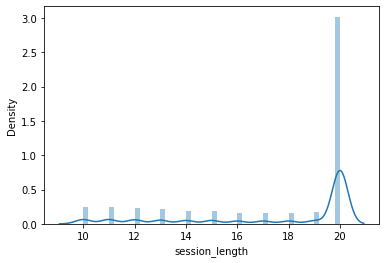

In [ ]:
sns.distplot(data.session_length)

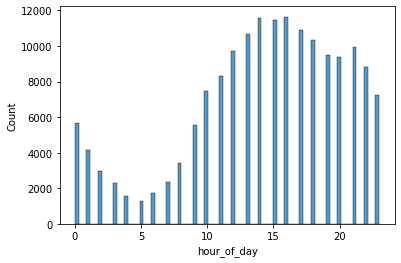

In [ ]:

sns.histplot(data['hour_of_day'])

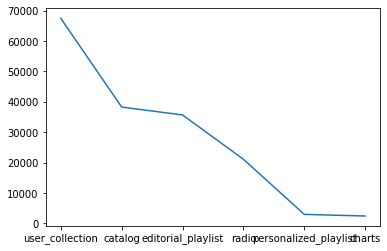

In [ ]:
data['context_type'].value_counts().plot()


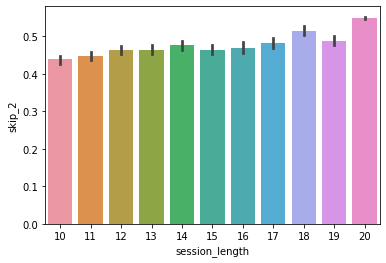

In [ ]:
sns.barplot(x ='session_length', y ='skip_2', data = data)


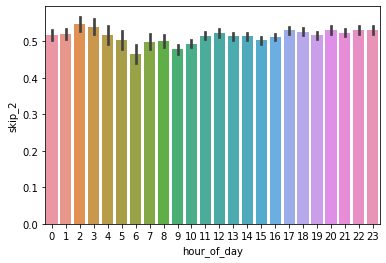

In [ ]:
sns.barplot(x ='hour_of_day', y ='skip_2', data = data)


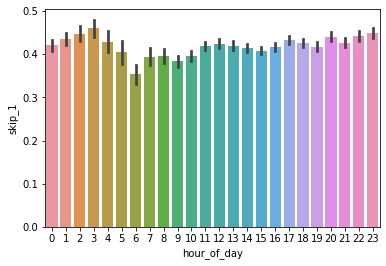

In [ ]:
sns.barplot(x ='hour_of_day', y ='skip_1', data = data)


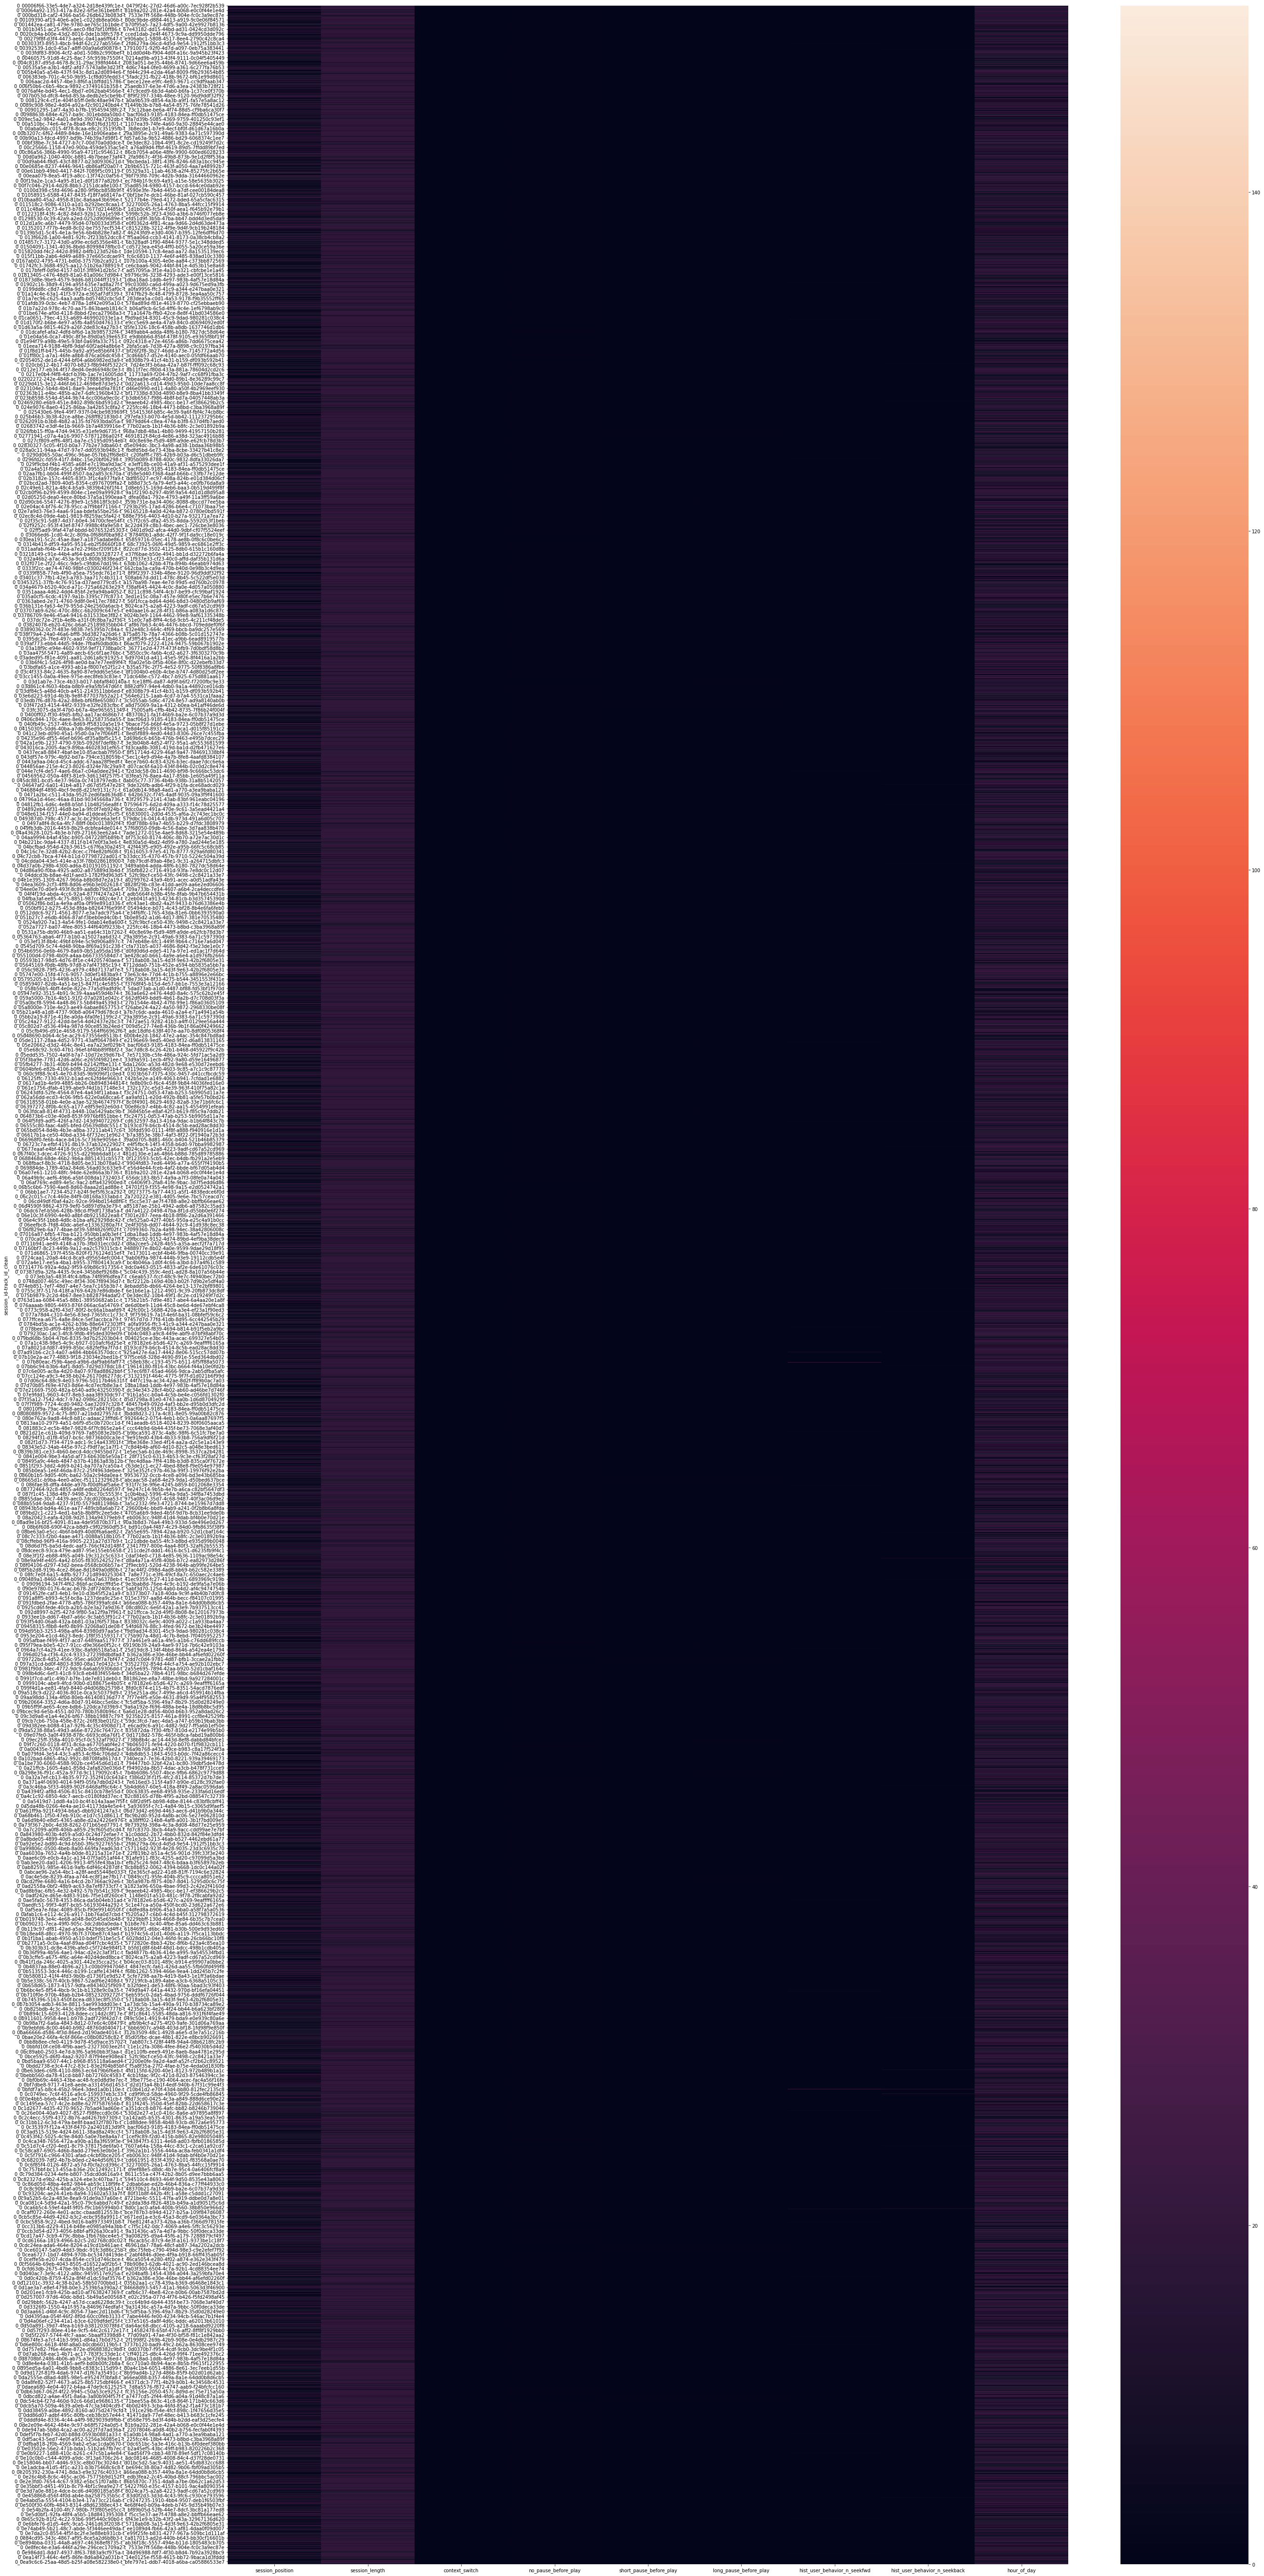

In [ ]:
plt.figure(figsize=(40,100))

# setting the parameter values
cmap = "tab20"
center = 0
#data = data.columns.dtype('int64')
numeric_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
data = data[numeric_cols]
# plotting the heatmap
hm = sns.heatmap(data=data)